In [1]:
import folium
import geopandas as gpd
import networkx as nx
import numpy as np
import pandas as pd
from folium import Choropleth, Marker
from matplotlib import pyplot as plt

In [2]:
conflicts_file_path = "../Dados/Ukraine_conflicts.csv"

df_conflicts = pd.read_csv(conflicts_file_path)

display(df_conflicts)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9415087,804,UKR64033,64033,15 July 2022,2022,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),...,Melitopol,46.8489,35.3653,1,061.ua,Subnational,"On 15 July 2022, Ukrainian forces shelled Meli...",0,1658249347,UKR
1,9415107,804,UKR63274,63274,15 July 2022,2022,1,Strategic developments,Disrupted weapons use,Military Forces of Ukraine (2019-),...,Bila Tserkva,49.8094,30.1121,2,24 Channel,National,"Interception: On 15 July 2022, Ukrainian air d...",0,1658249347,UKR
2,9415126,804,UKR63181,63181,15 July 2022,2022,1,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,...,Dnipro,48.4593,35.0386,1,24 Channel,National,"On 15 July 2022, Russian aircraft over the Cas...",0,1658249347,UKR
3,9415131,804,UKR63344,63344,15 July 2022,2022,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),...,Slovyansk,48.8533,37.6065,1,24 Channel,National,"On 15 July 2022, Russian forces shelled Slovya...",1,1658249347,UKR
4,9415142,804,UKR63275,63275,15 July 2022,2022,1,Strategic developments,Disrupted weapons use,Military Forces of Ukraine (2019-),...,Odesa,46.4639,30.7386,3,24 Channel,National,"Interception: On 15 July 2022, Ukrainian air d...",0,1658249347,UKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39386,9092833,804,UKR23175,23175,16 July 2019,2019,1,Violence against civilians,Attack,Military Forces of Ukraine (2014-2019),...,Odesa,46.4639,30.7386,1,24 Channel; Novoye Vremya Ukraine,National,"On 16 July 2019, a man was shot in his leg by ...",0,1649875489,UKR
39387,9092834,804,UKR23176,23176,16 July 2019,2019,1,Protests,Peaceful protest,Protesters (Ukraine),...,Kyiv - Shevchenkivskyi,50.4646,30.4655,1,Novoye Vremya Ukraine; Right Sector; Svoboda; ...,Other-National,"On 16 July 2019, several dozen people, includi...",0,1649875489,UKR
39388,9092835,804,UKR23560,23560,16 July 2019,2019,1,Protests,Peaceful protest,Protesters (Ukraine),...,Odesa,46.4639,30.7386,1,Sayt Goroda Odessy,Subnational,"On 16 July 2019, people attended a demonstrati...",0,1649875489,UKR
39389,9175245,804,UKR23178,23178,16 July 2019,2019,1,Battles,Armed clash,NAF: United Armed Forces of Novorossiya,...,Novotroitske,47.7158,37.5919,2,JFO HQ press centre; Ministry of Defence of Uk...,Other,"On 16 July 2019, the NAF rebel forces fired gr...",0,1651165035,UKR


In [64]:
string_sep = lambda x: x.replace(' ', '\n').replace('/', '/\n')

In [3]:
attrs = ['event_date', 'year', 'event_type', 'sub_event_type', 'fatalities', 'location', 'latitude', 'longitude']

df_conflicts_2022 = df_conflicts[df_conflicts['year'] >= 2022]

df_conflicts_2022 = df_conflicts_2022[attrs]

display(df_conflicts_2022)

,event_date,year,event_type,sub_event_type,fatalities,location,latitude,longitude
0,15 July 2022,2022,Explosions/Remote violence,Shelling/artillery/missile attack,0,Melitopol,46.8489,35.3653
1,15 July 2022,2022,Strategic developments,Disrupted weapons use,0,Bila Tserkva,49.8094,30.1121
2,15 July 2022,2022,Explosions/Remote violence,Air/drone strike,0,Dnipro,48.4593,35.0386
3,15 July 2022,2022,Explosions/Remote violence,Shelling/artillery/missile attack,1,Slovyansk,48.8533,37.6065
4,15 July 2022,2022,Strategic developments,Disrupted weapons use,0,Odesa,46.4639,30.7386
...,...,...,...,...,...,...,...,...
13450,01 January 2022,2022,Protests,Peaceful protest,0,Kryvyi Rih,47.9093,33.3933
13451,01 January 2022,2022,Protests,Peaceful protest,0,Lviv,49.8407,24.0305
13452,01 January 2022,2022,Protests,Peaceful protest,0,Kyiv,50.4496,30.5224
13453,01 January 2022,2022,Protests,Peaceful protest,0,Odesa,46.4639,30.7386


In [4]:
df_conflicts_2022.dtypes

event_date         object
year                int64
event_type         object
sub_event_type     object
fatalities          int64
location           object
latitude          float64
longitude         float64
dtype: object

In [5]:
df_subevent_type = df_conflicts_2022.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum().reset_index()

display(df_subevent_type)

,event_type,sub_event_type,fatalities
0,Battles,Armed clash,5580
1,Battles,Government regains territory,56
2,Battles,Non-state actor overtakes territory,44
3,Explosions/Remote violence,Air/drone strike,1533
4,Explosions/Remote violence,Grenade,6
5,Explosions/Remote violence,Remote explosive/landmine/IED,96
6,Explosions/Remote violence,Shelling/artillery/missile attack,3277
7,Protests,Excessive force against protesters,4
8,Protests,Peaceful protest,0
9,Protests,Protest with intervention,0


In [6]:
df_event_type = df_subevent_type.groupby('event_type')[['fatalities']].sum().reset_index()

display(df_event_type)

,event_type,fatalities
0,Battles,5680
1,Explosions/Remote violence,4912
2,Protests,4
3,Riots,0
4,Strategic developments,0
5,Violence against civilians,971


In [67]:
aux_subevent_fatal = df_subevent_type[df_subevent_type['fatalities'] > 0]
aux_event_fatal = df_event_type[df_event_type['fatalities'] > 0]

aux_events_fromsub_list = list(map(string_sep, aux_subevent_fatal.event_type.tolist()))
aux_subevents_list = list(map(string_sep, aux_subevent_fatal.sub_event_type.tolist()))
aux_fatal_per_subevent_list = aux_subevent_fatal.fatalities.tolist()

aux_events_list = list(map(string_sep,aux_event_fatal.event_type.tolist()))
aux_fatal_per_event_list = aux_event_fatal.fatalities.tolist()

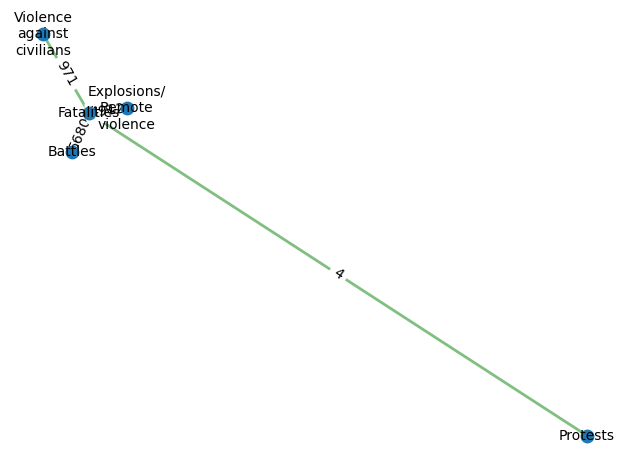

In [68]:
fatalities_graph = nx.Graph()

n1 = len(aux_events_list)

for i in range(n1):
    fatalities_graph.add_edge("Fatalities", aux_events_list[i], weight = aux_fatal_per_event_list[i])

edges = fatalities_graph.edges(data=True)#[(u, v) for (u, v, d) in fatalities_graph.edges(data=True) if d["weight"] > 0.5]
    
pos = nx.spring_layout(fatalities_graph, seed=1) 

nx.draw_networkx_nodes(fatalities_graph, pos, node_size=80)
nx.draw_networkx_edges(fatalities_graph, pos, edgelist=edges, alpha=0.5, edge_color="g", width=2)

edge_labels = nx.get_edge_attributes(fatalities_graph, "weight")
nx.draw_networkx_edge_labels(fatalities_graph, pos, edge_labels)

nx.draw_networkx_labels(fatalities_graph, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()
plt.show()

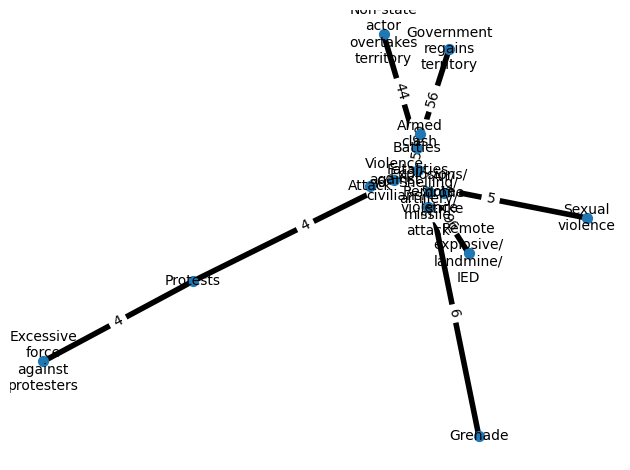

In [69]:
n2 = len(aux_events_fromsub_list)

# aux_events_fromsub_list = df_subevent_type.event_type.tolist()
# aux_subevents_list = df_subevent_type.sub_event_type.tolist()
# aux_fatal_per_subevent_list = df_subevent_type.fatalities.tolist()

for i in range(n2):
    fatalities_graph.add_edge(aux_events_fromsub_list[i], aux_subevents_list[i], weight = aux_fatal_per_subevent_list[i])

edges = fatalities_graph.edges(data=True)#[(u, v) for (u, v, d) in fatalities_graph.edges(data=True) if d["weight"] > 0.5]
    
pos = nx.spring_layout(fatalities_graph) 

nx.draw_networkx_nodes(fatalities_graph, pos, node_size=50)
nx.draw_networkx_edges(fatalities_graph, pos, edgelist=edges, width=4)

edge_labels = nx.get_edge_attributes(fatalities_graph, "weight")
nx.draw_networkx_edge_labels(fatalities_graph, pos, edge_labels)

nx.draw_networkx_labels(fatalities_graph, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()
plt.show()
    

In [70]:
from random import choice

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(vert_loc, xcenter)}
        else:
            pos[root] = (vert_loc, xcenter)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

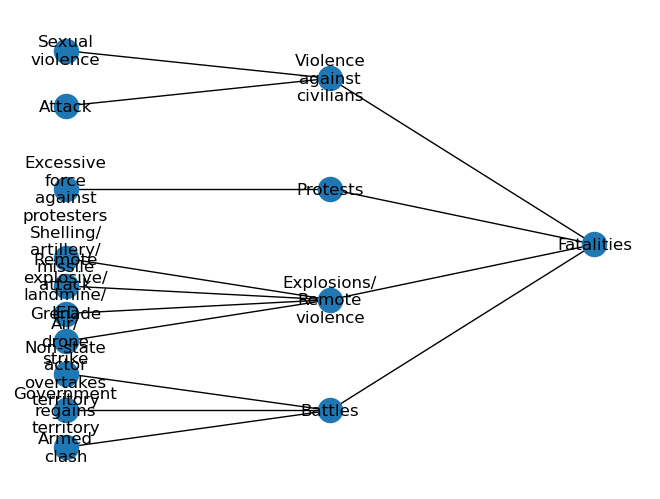

In [71]:
G=nx.Graph()

#for i in range(n2):
#    fatalities_graph.add_edge(aux_events_fromsub_list[i], aux_subevents_list[i], weight = aux_fatal_per_subevent_list[i])

for i in range(n1):
    G.add_edge("Fatalities", aux_events_list[i], weight = aux_fatal_per_event_list[i])

for i in range(n2):
    G.add_edge(aux_events_fromsub_list[i], aux_subevents_list[i], weight = aux_fatal_per_subevent_list[i])

# edges_list = list(zip(aux_events_fromsub_list, aux_subevents_list)) 

# for i in range(n1):
#     edges_list.append(("Fatalities", aux_events_list[i], aux_fatal_per_event_list[i]))

# G.add_edges_from(edges_list)
pos = hierarchy_pos(G, "Fatalities")    
nx.draw(G, pos=pos, with_labels=True)
plt.show()

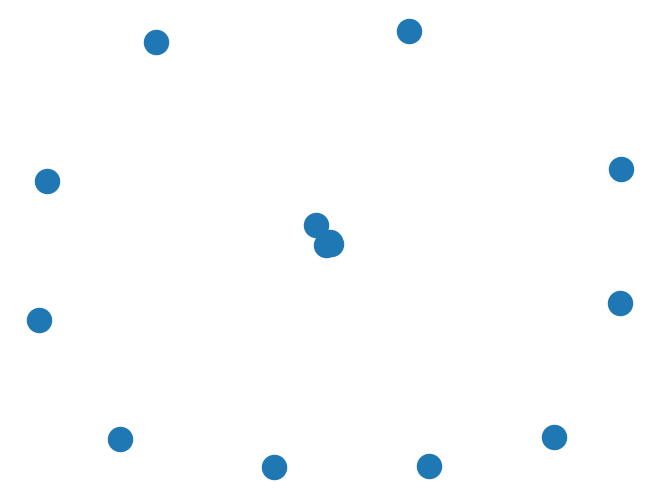

In [72]:
grafo = nx.Graph()

grafo.add_node("Fatalities")

for i, node in enumerate(aux_events_list):
    grafo.add_edge("Fatalities", node, weight = aux_fatal_per_event_list[i])
    

for node in aux_subevents_list:
    grafo.add_node(node)


nx.draw(grafo)

plt.show()

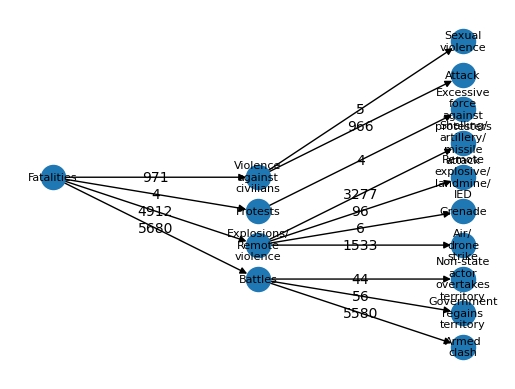

In [73]:
g1 = nx.DiGraph()

pos = dict()

pos["Fatalities"] = (1, n2//2)

for i, node in enumerate(aux_events_list):
    g1.add_edge("Fatalities", node, weight = aux_fatal_per_event_list[i])
    
    pos[node] = (2, i + n2//n1)
    
for i, node in enumerate(aux_subevents_list):
    g1.add_edge(aux_events_fromsub_list[i], node, weight = aux_fatal_per_subevent_list[i])
    
    pos[node] = (3, i)

nx.draw_networkx_edge_labels(g1, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(g1, 'weight'), 
                             rotate = False, 
                             font_size = 10)
nx.draw(g1, pos = pos, with_labels = True, font_size = 8)

['Battles', 'Explosions/\nRemote\nviolence', 'Protests', 'Violence\nagainst\ncivilians']
[5680, 4912, 4, 971]



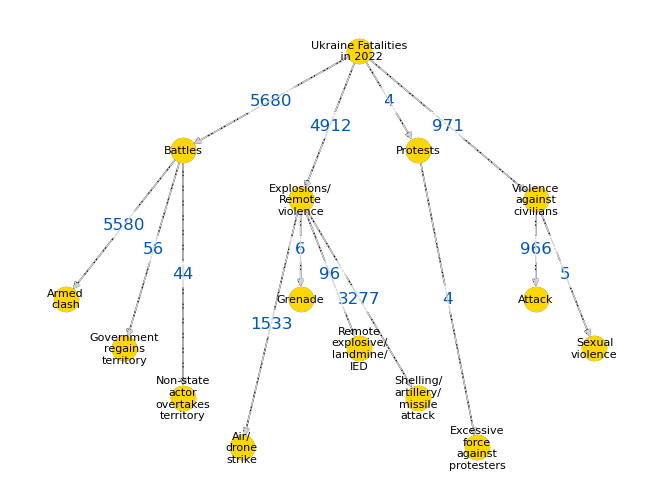

In [94]:
g1 = nx.DiGraph()

pos = dict()

pos["Ukraine Fatalities\n in 2022"] = (n2//2, 6)

for i, node in enumerate(aux_events_list):
    g1.add_edge("Ukraine Fatalities\n in 2022", node, weight = aux_fatal_per_event_list[i])
    
    pos[node] = (i*2 + n2//n1, 4 - i%2)
    
for i, node in enumerate(aux_subevents_list):
    g1.add_edge(aux_events_fromsub_list[i], node, weight = aux_fatal_per_subevent_list[i])
    
    pos[node] = (i, 1 - i%(n1))

    
nx.draw(g1, pos = pos, with_labels = True, font_size = 8)

nx.draw_networkx_edge_labels(g1, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(g1, 'weight'), 
                             rotate = False, 
                             font_size = 12,
                             font_color = '#0057b7',
                             alpha = 1
                            )

nx.draw_networkx_nodes(g1, 
                       pos = pos,
                       node_color = '#ffd700'
                      )

nx.draw_networkx_edges(g1, 
                       pos = pos,
                       style = '-.',
                       edge_color = 'LightGray'
                      )

print(aux_events_list, aux_fatal_per_event_list, sep = '\n', end = '\n\n')

In [15]:
df_fatalities_per_area = df_conflicts_2022.groupby(['location', 'latitude', 'longitude'])[['fatalities']].sum()

df_fatalities_per_area = df_fatalities_per_area[df_fatalities_per_area['fatalities'] > 0].reset_index()

display(df_fatalities_per_area)

,location,latitude,longitude,fatalities
0,Adamivka,48.9430,37.4481,2
1,Andriivka,47.1761,33.0463,10
2,Antopil,50.5998,26.4405,9
3,Apostolove,47.6600,33.7137,4
4,Avdiivka,48.1394,37.7497,97
...,...,...,...,...
480,Zolochiv,50.2799,35.9818,23
481,Zolote,48.6926,38.5145,23
482,Zolote-5,48.6719,38.5600,2
483,Zorya,47.2958,37.6081,2
